In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shap
from scipy.io import savemat
from sklearn.model_selection import train_test_split
# fitting random forest regression to the dataset
from sklearn.ensemble import RandomForestRegressor

In [11]:

def getPredict(filename,random_statev,nestimators):
    dataset = pd.read_csv(filename)
    #dataset = dataset.sample(n=500)
    dataX = dataset[["Z","Roll","Pitch","Yaw","Edensity","Homogeneity","SurfInner","SurfOuter","Volume","Elongation","Sphericity","Vsratio","RoughInner",	"RoughOuter","Contact","PDensity","DisNearest","locVolume","locOri","locElongation","locSphericity"]]
    datay = dataset["Damage"]
    X_train, X_test, y_train, y_test = train_test_split(dataX, datay, test_size = 0.05,random_state = random_statev)
    regressor = RandomForestRegressor(n_estimators = nestimators, random_state = random_statev, criterion = 'mae', oob_score=True, max_leaf_nodes = 30, max_features="sqrt",min_impurity_decrease=1.02e-5,warm_start=False,min_samples_leaf=1,min_weight_fraction_leaf=0,bootstrap=True)
    regressor.fit(X_train.values, y_train.values)
    y_pred = regressor.predict(X_test.values)
    df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
    #print(df)
    #savemat("fitting_"+filename+"_"+str(randomstate)+".mat", {'y_test': y_test.values,'y_pred': y_pred})
    featurenames = dataX.columns.values
    return regressor, y_pred, y_test, df, featurenames,dataX,datay,X_train, X_test, y_train, y_test
    

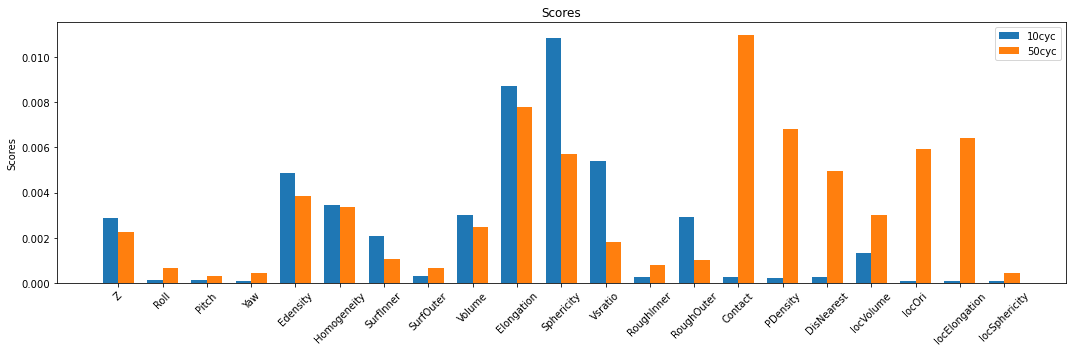

In [12]:
randomstate = 0 # for reproducity
regressor10, y_pred10, y_test10, df10,featurenames10,dataX10,dataY10,X_train10, X_test10, y_train10, y_test10 = getPredict('../data/features_10cyc.csv',randomstate,40)
regressor50, y_pred50, y_test50, df50,featurenames50,dataX50,dataY50,X_train50, X_test50, y_train50, y_test50 = getPredict('../data/features_50cyc.csv',randomstate,40)
explainer = shap.TreeExplainer(regressor10)
shap_values1 = explainer.shap_values(X_train10)
explainer = shap.TreeExplainer(regressor50)
shap_values2 = explainer.shap_values(X_train50)
overall1 = abs(shap_values1).mean(0)
# overall1 = (overall1-min(overall1)+0.001)/(max(overall1)-min(overall1)+0.001)
overall2 = abs(shap_values2).mean(0)
# overall2 = (overall2-min(overall2)+0.001)/(max(overall2)-min(overall2)+0.001)
x = np.arange(len(featurenames10))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x - width/2, overall1, width, label='10cyc')
rects2 = ax.bar(x + width/2, overall2, width, label='50cyc')
ax.set_ylabel('Scores')
ax.set_title('Scores')
ax.set_xticks(x)
# ax.set_xticklabels(featurenames10[sortindex])
ax.set_xticklabels(featurenames10)
ax.legend()
plt.xticks(rotation=45)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#print(overall1)
#print(overall2)

from scipy.io import savemat
savemat("overall_result_seed"+str(randomstate)+".mat", {'featurenames': featurenames10,'cyc10': overall1,'cyc50': overall2})

To diminish the spurious contributions coming from the algorithm initialization and data size, we trained various regression models through two robustness validation strategies: 
- instead of using the full training data, we randomly draw 500 particles for 10 times and performed the regression.
- the randomness of the bootstrapping of the samples used when building trees and the sampling of the attributes to consider when looking for the best split at each node are set to be 10 different values.

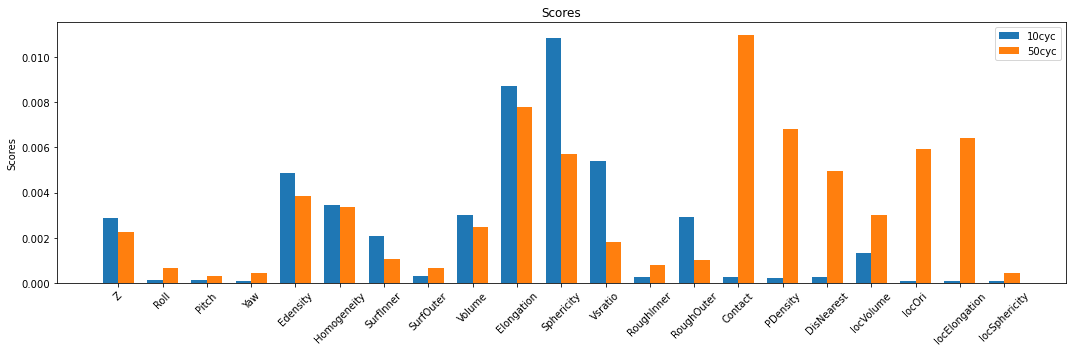

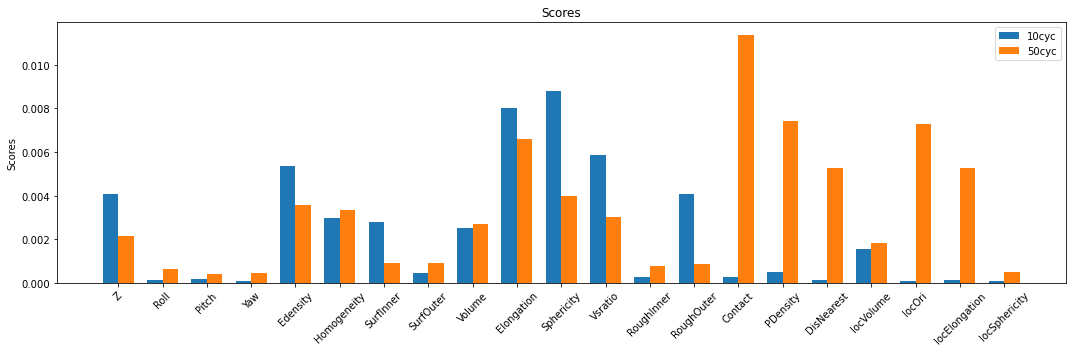

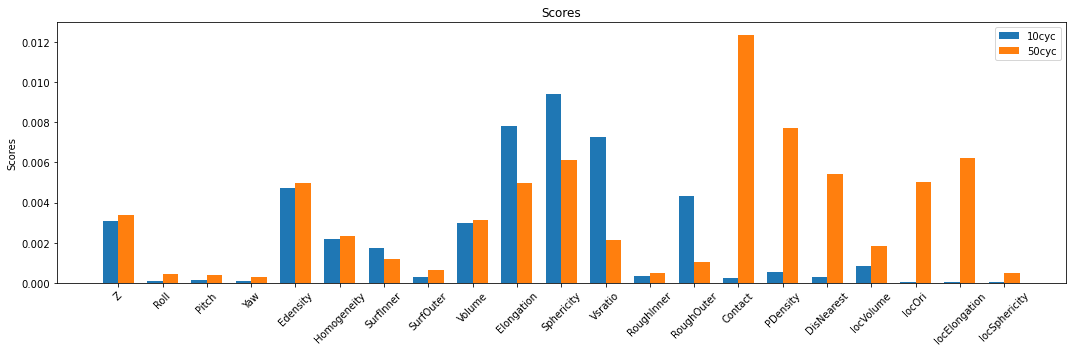

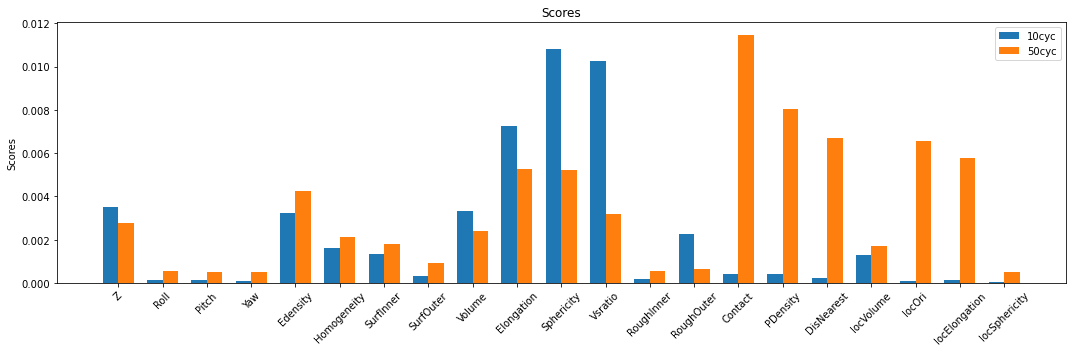

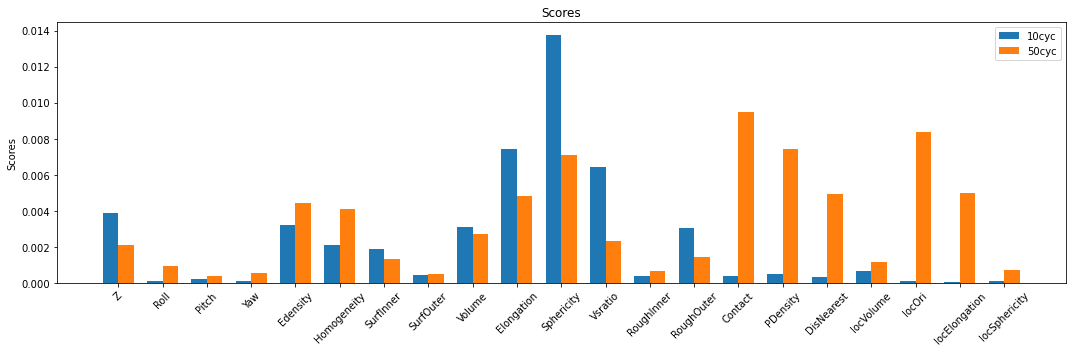

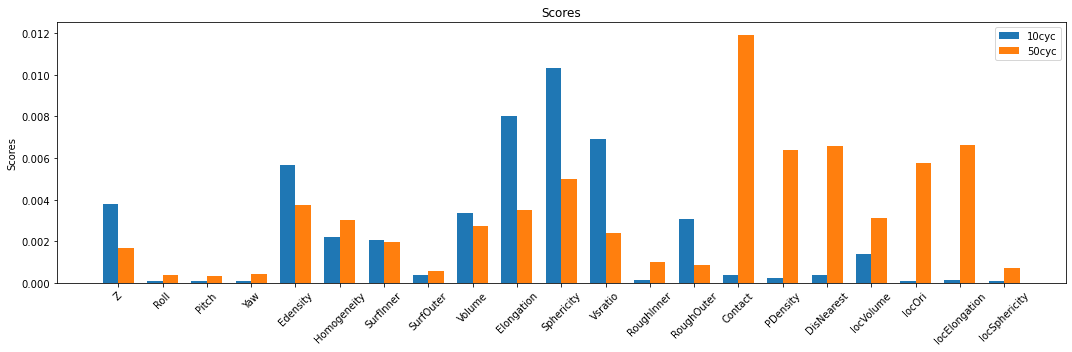

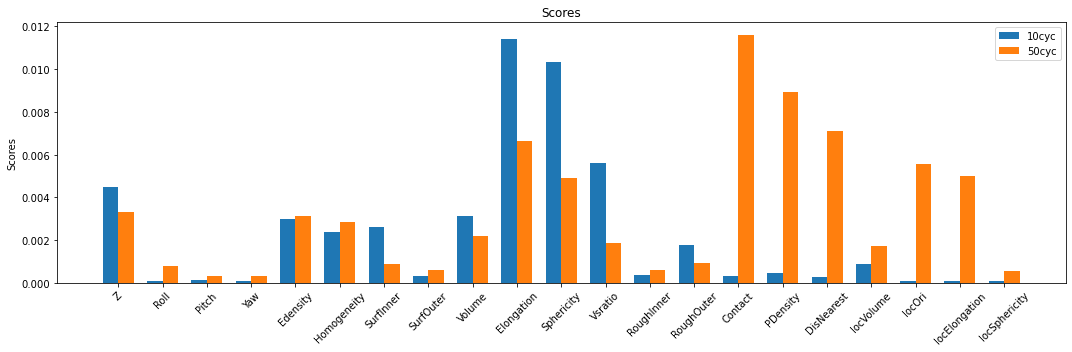

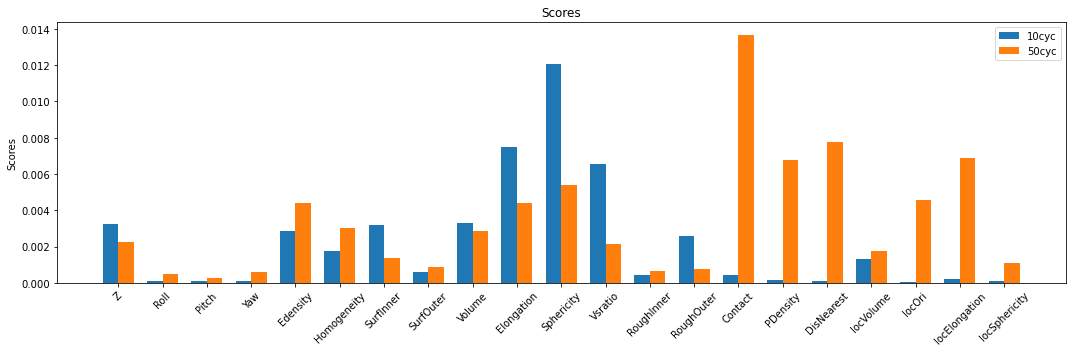

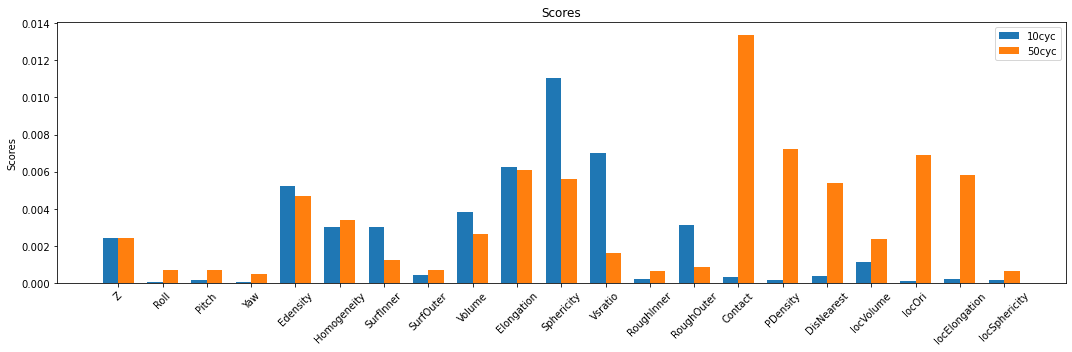

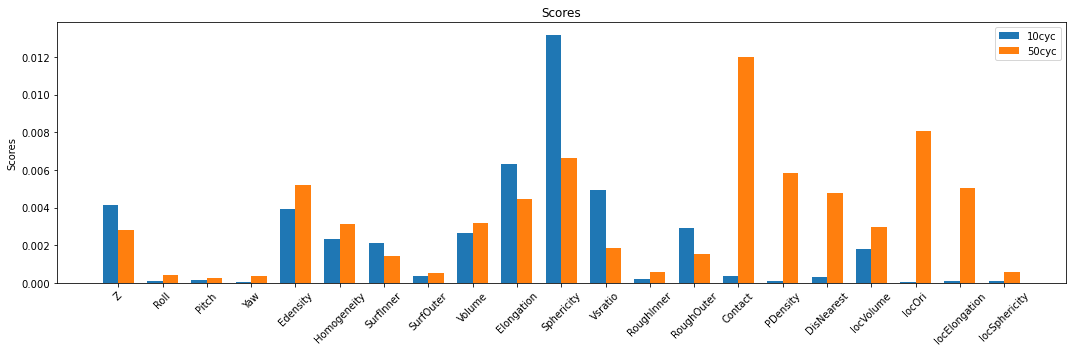

In [14]:
for randomi in range(0,10):
    randomstate = randomi # for reproducity
    regressor10, y_pred10, y_test10, df10,featurenames10,dataX10,dataY10,X_train10, X_test10, y_train10, y_test10 = getPredict('../data/features_10cyc.csv',randomstate,40)
    regressor50, y_pred50, y_test50, df50,featurenames50,dataX50,dataY50,X_train50, X_test50, y_train50, y_test50 = getPredict('../data/features_50cyc.csv',randomstate,40)
    explainer = shap.TreeExplainer(regressor10)
    shap_values1 = explainer.shap_values(X_train10)
    explainer = shap.TreeExplainer(regressor50)
    shap_values2 = explainer.shap_values(X_train50)
    overall1 = abs(shap_values1).mean(0)
# overall1 = (overall1-min(overall1)+0.001)/(max(overall1)-min(overall1)+0.001)
    overall2 = abs(shap_values2).mean(0)
# overall2 = (overall2-min(overall2)+0.001)/(max(overall2)-min(overall2)+0.001)
    x = np.arange(len(featurenames10))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(15, 5))
    rects1 = ax.bar(x - width/2, overall1, width, label='10cyc')
    rects2 = ax.bar(x + width/2, overall2, width, label='50cyc')
    ax.set_ylabel('Scores')
    ax.set_title('Scores')
    ax.set_xticks(x)
# ax.set_xticklabels(featurenames10[sortindex])
    ax.set_xticklabels(featurenames10)
    ax.legend()
    plt.xticks(rotation=45)
    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

    #print(overall1)
    #print(overall2)

    from scipy.io import savemat
    savemat("overall_result_seed"+str(randomstate)+".mat", {'featurenames': featurenames10,'cyc10': overall1,'cyc50': overall2})

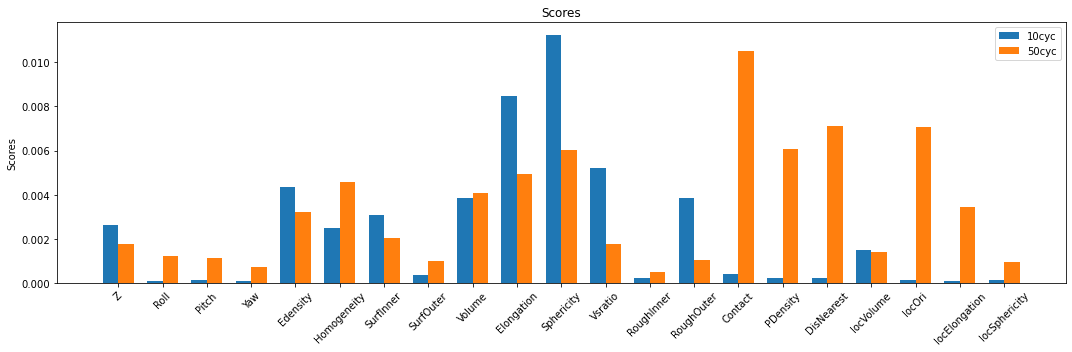

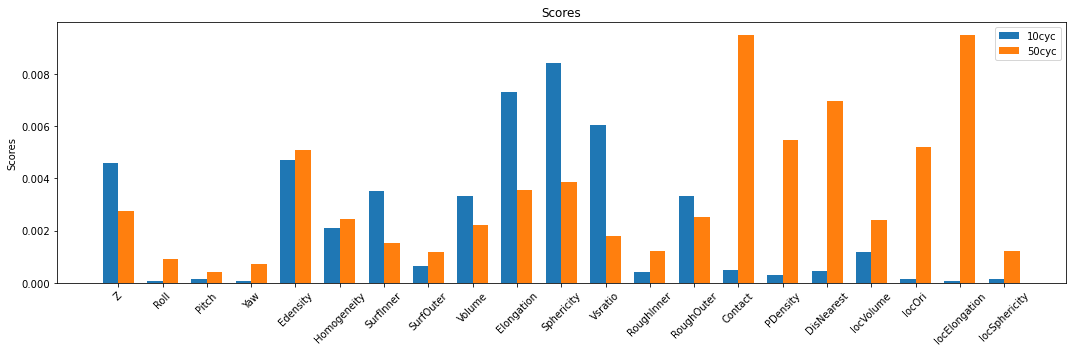

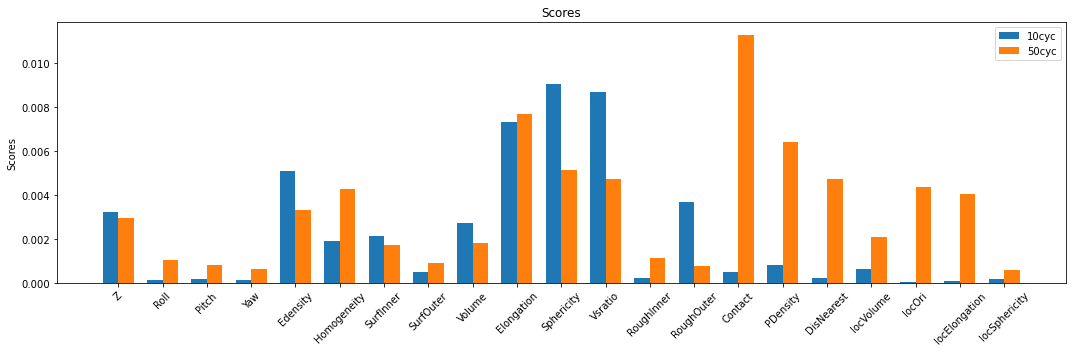

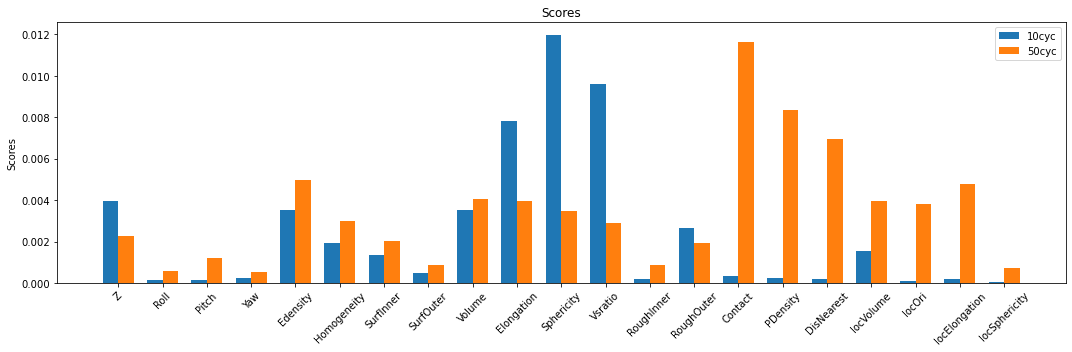

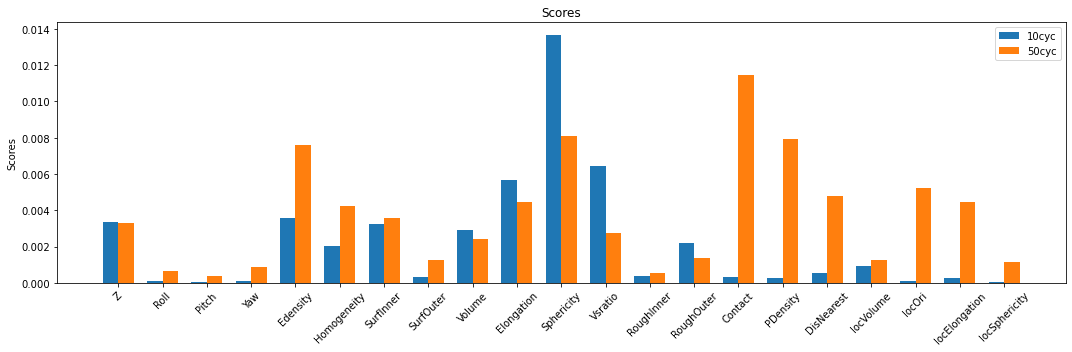

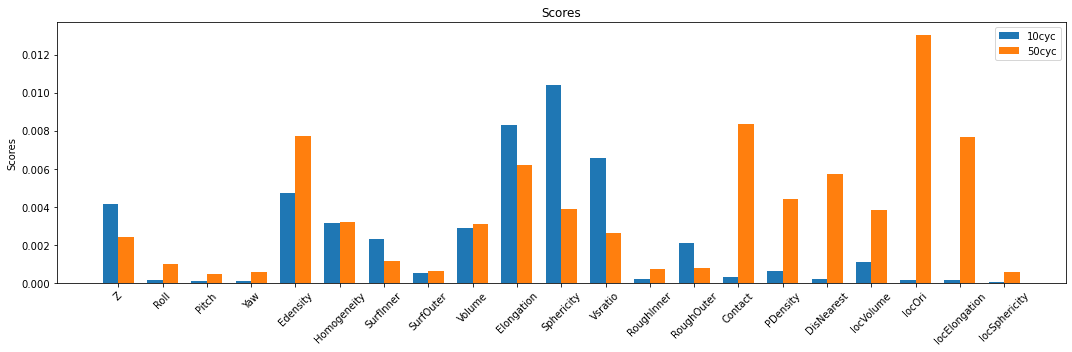

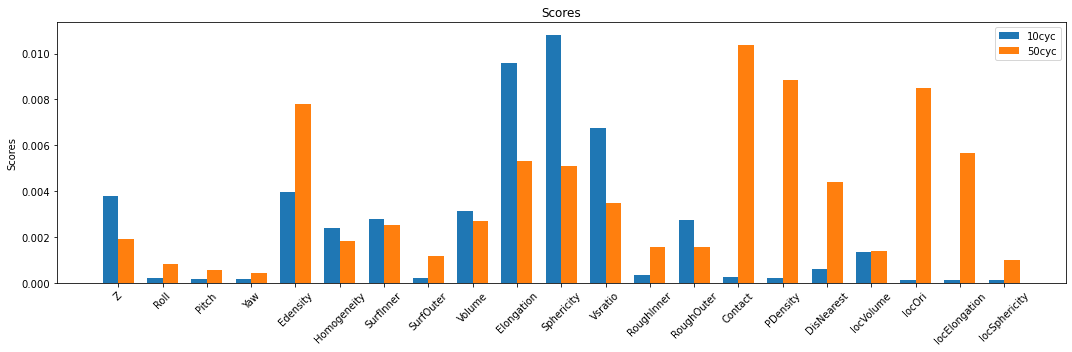

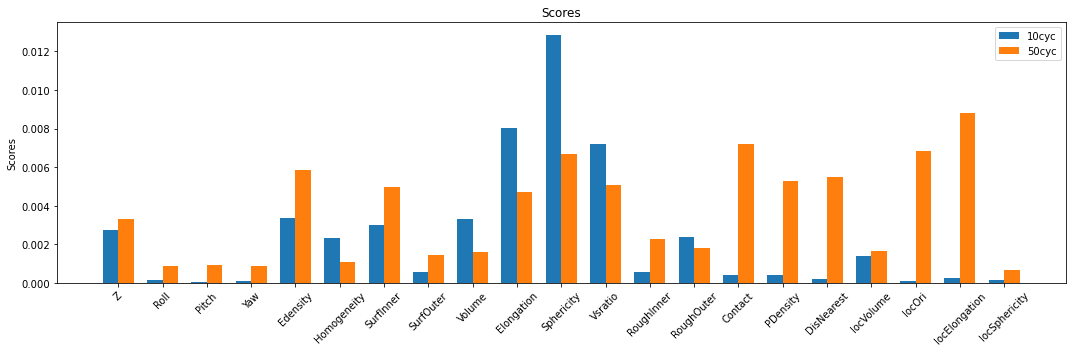

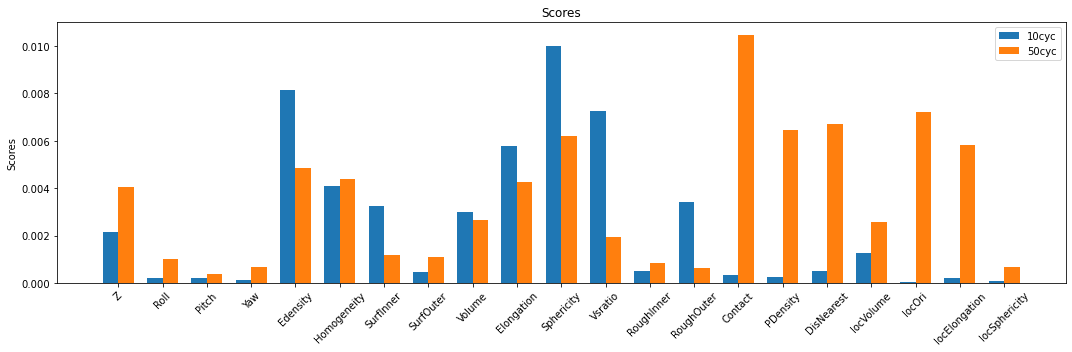

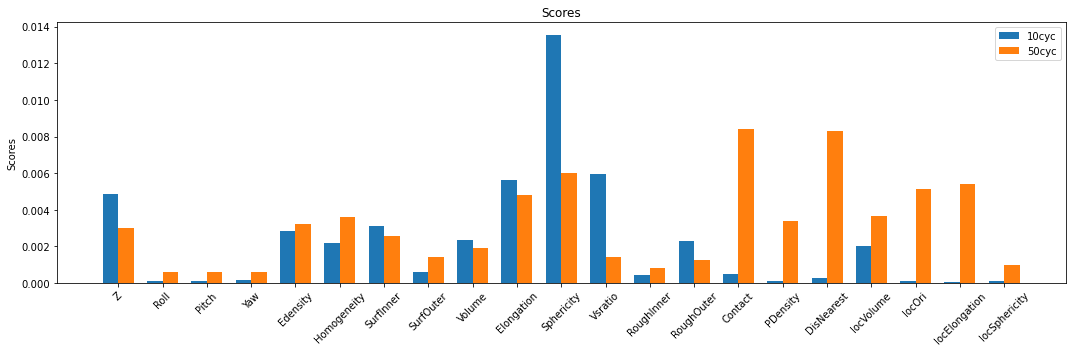

In [15]:
def getPredictSubset(filename,random_statev,nestimators):
    dataset = pd.read_csv(filename)
    dataset = dataset.sample(n=500,random_state=random_statev)
    dataX = dataset[["Z","Roll","Pitch","Yaw","Edensity","Homogeneity","SurfInner","SurfOuter","Volume","Elongation","Sphericity","Vsratio","RoughInner",	"RoughOuter","Contact","PDensity","DisNearest","locVolume","locOri","locElongation","locSphericity"]]
    datay = dataset["Damage"]
    X_train, X_test, y_train, y_test = train_test_split(dataX, datay, test_size = 0.05,random_state = random_statev)
    regressor = RandomForestRegressor(n_estimators = nestimators, random_state = random_statev, criterion = 'mae', oob_score=True, max_leaf_nodes = 30, max_features="sqrt",min_impurity_decrease=1.02e-5,warm_start=False,min_samples_leaf=1,min_weight_fraction_leaf=0,bootstrap=True)
    
    regressor.fit(X_train.values, y_train.values)
    y_pred = regressor.predict(X_test.values)
    df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})

    featurenames = dataX.columns.values
    return regressor, y_pred, y_test, df, featurenames,dataX,datay,X_train, X_test, y_train, y_test
    

for randomi in range(0,10):
    randomstate = randomi # for reproducity
    regressor10, y_pred10, y_test10, df10,featurenames10,dataX10,dataY10,X_train10, X_test10, y_train10, y_test10 = getPredictSubset('../data/features_10cyc.csv',randomstate,40)
    regressor50, y_pred50, y_test50, df50,featurenames50,dataX50,dataY50,X_train50, X_test50, y_train50, y_test50 = getPredictSubset('../data/features_50cyc.csv',randomstate,40)
    explainer = shap.TreeExplainer(regressor10)
    shap_values1 = explainer.shap_values(X_train10)
    explainer = shap.TreeExplainer(regressor50)
    shap_values2 = explainer.shap_values(X_train50)
    overall1 = abs(shap_values1).mean(0)
# overall1 = (overall1-min(overall1)+0.001)/(max(overall1)-min(overall1)+0.001)
    overall2 = abs(shap_values2).mean(0)
# overall2 = (overall2-min(overall2)+0.001)/(max(overall2)-min(overall2)+0.001)
    x = np.arange(len(featurenames10))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(15, 5))
    rects1 = ax.bar(x - width/2, overall1, width, label='10cyc')
    rects2 = ax.bar(x + width/2, overall2, width, label='50cyc')
    ax.set_ylabel('Scores')
    ax.set_title('Scores')
    ax.set_xticks(x)
# ax.set_xticklabels(featurenames10[sortindex])
    ax.set_xticklabels(featurenames10)
    ax.legend()
    plt.xticks(rotation=45)
    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

    #print(overall1)
    #print(overall2)

    from scipy.io import savemat
    savemat("overall_result_seed_subset"+str(randomstate)+".mat", {'featurenames': featurenames10,'cyc10': overall1,'cyc50': overall2})